In [17]:
#KNN Signature Classifier
import matplotlib.pyplot as plt 
import pickle
import numpy as np
import os
import cv2
from sklearn.neighbors import KNeighborsClassifier

In [18]:
DATADIR = "./Signature/Scan test/SignatureTrain"
subdirs = [file for file in os.listdir(DATADIR)]

['Bozena', 'Mike', 'Tarek']


In [19]:
training_data = []
LABELS = ['Bozena','Mike','Tarek']
def create_training_data():
    subdirs = []
    for subdir in os.listdir(DATADIR):
        subdirs.append(subdir)
        print(subdir)
        class_num = LABELS.index(subdir)
        for file in os.listdir(DATADIR+"/"+subdir):
            image_path = os.path.join(DATADIR+"/"+subdir,file)
            image_array = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            #print(image_array)
            training_data.append([image_array,class_num])
create_training_data()
print(training_data[0][0].shape)

Bozena
Mike
Tarek
(100, 100)


In [4]:
import random
random.shuffle(training_data)

In [5]:
X_train = []
y_train = []


for features,labels in training_data:
    #print(features)
    features = features.flatten()
    X_train.append(features)
    y_train.append(labels)

In [6]:
print(y_train)

[2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1]


In [20]:
test_data = []

def create_test_data():
    DATADIR = './Signature\\Scan test\\SignatureTest'
    LABELS = ['Bozena','Mike','Tarek']
    for directory in os.listdir(DATADIR):
        for file in os.listdir(DATADIR+"/"+directory):
            image = cv2.imread(DATADIR+"/"+directory+"/"+file,cv2.IMREAD_GRAYSCALE)
            test_data.append([image,LABELS.index(directory)])
create_test_data()
print(test_data[0][1])

0


In [21]:
X_test = []
y_test = []

In [22]:
for features,labels in test_data:
    features = features.flatten()
    X_test.append(features)
    y_test.append(labels)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math
classifier = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(X_train))/2))
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


60


In [11]:
PredictedLabels = [LABELS[index] for index in y_pred]
print("Predicted Labels:", PredictedLabels)

Predicted Labels: ['Bozena', 'Mike', 'Bozena', 'Bozena', 'Mike', 'Bozena', 'Bozena', 'Bozena', 'Mike', 'Bozena', 'Mike', 'Bozena', 'Bozena', 'Bozena', 'Mike', 'Mike', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Mike', 'Tarek', 'Tarek', 'Mike', 'Tarek', 'Tarek', 'Tarek']


In [12]:
ActualLabels = [LABELS[index] for index in y_test]
acc = accuracy_score(y_test,y_pred)
print("Accuracy",acc*100,"%")

Actual Labels ['Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Bozena', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Mike', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek', 'Tarek']
Accuracy 81.66666666666667 %


In [15]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2157adc2ac8>)

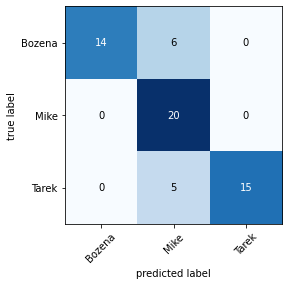

In [16]:
matrix = confusion_matrix(ActualLabels,PredictedLabels)
TEST_LABELS = ["Bozena", "Mike", "Tarek"]
plot_confusion_matrix(conf_mat=matrix, class_names = TEST_LABELS)